## WeatherPy
-------------------------------------------------------------------------------------------------------------------------------

In [2]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#install from command line before opening jupyter notebook as 'pip install citipy'
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


608

In [8]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url+city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] - 273.15 # Minus 273.15 to convert the temperature into Celsius
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | okha
Processing Record 2 of Set 1 | san juan
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | ilulissat
Processing Record 5 of Set 1 | fulitun
City not found. Skipping...
Processing Record 6 of Set 1 | san quintin
Processing Record 7 of Set 1 | santa fe do sul
Processing Record 8 of Set 1 | gat
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | sao joao da barra
Processing Record 11 of Set 1 | cherskiy
Processing Record 12 of Set 1 | misratah
Processing Record 13 of Set 1 | coahuayana
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | lagoa
Processing Record 16 of Set 1 | saskylakh
Processing Record 17 of Set 1 | denpasar
Processing Record 18 of Set 1 | boueni
Processing Record 19 of Set 1 | biscarrosse
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | constantine
Processing Record 22 of Set 1 | dunedin


City not found. Skipping...
Processing Record 37 of Set 4 | arraial do cabo
Processing Record 38 of Set 4 | maniitsoq
Processing Record 39 of Set 4 | albuquerque
Processing Record 40 of Set 4 | jishou
Processing Record 41 of Set 4 | santa ana
Processing Record 42 of Set 4 | pevek
Processing Record 43 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 44 of Set 4 | bambous virieux
Processing Record 45 of Set 4 | bengkulu
Processing Record 46 of Set 4 | acapulco
Processing Record 47 of Set 4 | mahebourg
Processing Record 48 of Set 4 | saint george
Processing Record 49 of Set 4 | palmas
Processing Record 0 of Set 5 | wajid
Processing Record 1 of Set 5 | thompson
Processing Record 2 of Set 5 | boyolangu
Processing Record 3 of Set 5 | iraray
Processing Record 4 of Set 5 | luanda
Processing Record 5 of Set 5 | khatanga
Processing Record 6 of Set 5 | uyo
Processing Record 7 of Set 5 | lagunas
Processing Record 8 of Set 5 | upernavik
Processing Record 9 of Set 5 | haapiti
Pro

Processing Record 28 of Set 8 | alamosa
Processing Record 29 of Set 8 | krasnoselkup
Processing Record 30 of Set 8 | necochea
Processing Record 31 of Set 8 | neiafu
Processing Record 32 of Set 8 | komsomolskiy
Processing Record 33 of Set 8 | novosokolniki
Processing Record 34 of Set 8 | ostuacan
Processing Record 35 of Set 8 | longlac
City not found. Skipping...
Processing Record 36 of Set 8 | dongying
Processing Record 37 of Set 8 | casablanca
Processing Record 38 of Set 8 | havre-saint-pierre
Processing Record 39 of Set 8 | narsaq
Processing Record 40 of Set 8 | mogadouro
Processing Record 41 of Set 8 | rabo de peixe
Processing Record 42 of Set 8 | urumqi
Processing Record 43 of Set 8 | manzil salim
Processing Record 44 of Set 8 | jiblah
Processing Record 45 of Set 8 | nemuro
Processing Record 46 of Set 8 | lebu
Processing Record 47 of Set 8 | saint-louis
Processing Record 48 of Set 8 | camacha
Processing Record 49 of Set 8 | sinnamary
Processing Record 0 of Set 9 | ornskoldsvik
Proc

Processing Record 11 of Set 12 | jining
Processing Record 12 of Set 12 | saint pete beach
Processing Record 13 of Set 12 | jieshi
Processing Record 14 of Set 12 | sterling
Processing Record 15 of Set 12 | ballina
Processing Record 16 of Set 12 | port lincoln
Processing Record 17 of Set 12 | hurricane
Processing Record 18 of Set 12 | rafai
Processing Record 19 of Set 12 | altamira
Processing Record 20 of Set 12 | havelock
Processing Record 21 of Set 12 | nouadhibou
Processing Record 22 of Set 12 | padang
Processing Record 23 of Set 12 | bilibino
Processing Record 24 of Set 12 | sao paulo de olivenca
Processing Record 25 of Set 12 | iquitos
Processing Record 26 of Set 12 | zhicheng
Processing Record 27 of Set 12 | kapit
Processing Record 28 of Set 12 | nibbar
Processing Record 29 of Set 12 | ixtlan del rio
Processing Record 30 of Set 12 | xuddur
Processing Record 31 of Set 12 | lakeside
Processing Record 32 of Set 12 | rocha
Processing Record 33 of Set 12 | cabedelo
Processing Record 34 

In [12]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,okha,53.5739,142.9478,-31.64,94,41,6.04,RU,1674493383
1,san juan,-31.5375,-68.5364,35.84,21,0,6.01,AR,1674493384
2,jamestown,42.0970,-79.2353,-1.23,75,100,5.14,US,1674493385
3,ilulissat,69.2167,-51.1000,-10.99,85,75,3.60,GL,1674493385
4,san quintin,30.4833,-115.9500,13.44,49,3,1.46,MX,1674493387


In [15]:
# Export the City_Data into a csv

city_data_df.to_csv("C:/Users/khinh/Documents/activity/pythondata/test/Assignment/python_api_challenge/Output_data/cities.csv", index_label="City_ID")


In [16]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/khinh/Documents/activity/pythondata/test/Assignment/python_api_challenge/Output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,okha,53.5739,142.9478,-31.64,94,41,6.04,RU,1674493383
1,san juan,-31.5375,-68.5364,35.84,21,0,6.01,AR,1674493384
2,jamestown,42.0970,-79.2353,-1.23,75,100,5.14,US,1674493385
3,ilulissat,69.2167,-51.1000,-10.99,85,75,3.60,GL,1674493385
4,san quintin,30.4833,-115.9500,13.44,49,3,1.46,MX,1674493387


In [17]:
#Set the dataframe
def date_conv(time_stamp):
    date_run = time.localtime(time_stamp)
    date = [date_run.tm_year, date_run.tm_mon, date_run.tm_mday]
    return date


### Latitude Vs. Temperature


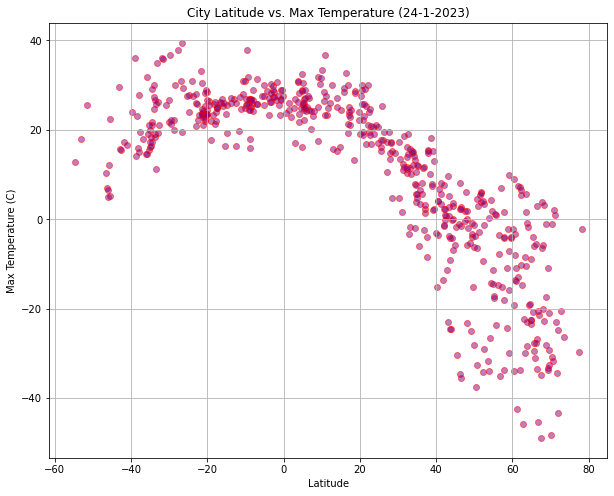

In [20]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.figure(figsize=(10, 8))
plt.scatter(x_axis,y_axis, marker="o", facecolors="purple",alpha=0.5, color='r')

date = date_conv(city_data_df["Date"][0])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Latitude vs. Max Temperature ({date[2]}-{date[1]}-{date[0]})') 
plt.grid()

# Save the output figure
plt.savefig("C:/Users/khinh/Documents/activity/pythondata/test/Assignment/python_api_challenge/Output_data/fig1.png")

# Show plot
plt.show()


### Latitude Vs. Humidity

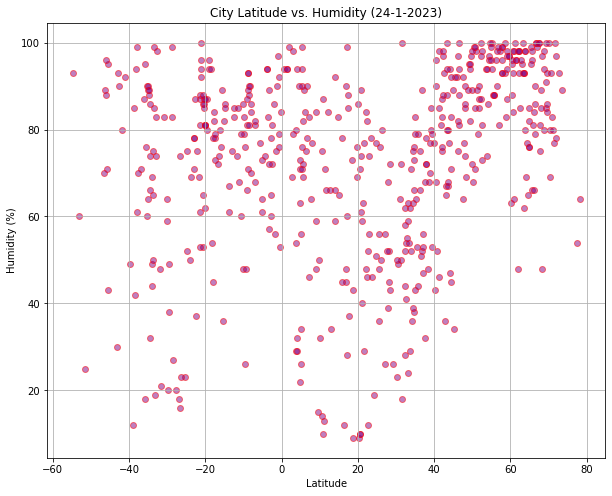

In [22]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]
plt.figure(figsize=(10, 8))
plt.scatter(x_axis,y_axis, marker="o", facecolors="purple",alpha=0.5, color='r')

date = date_conv(city_data_df["Date"][0])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({date[2]}-{date[1]}-{date[0]})') 
plt.grid()

# Save the output figure
plt.savefig("C:/Users/khinh/Documents/activity/pythondata/test/Assignment/python_api_challenge/Output_data/Fig2.png")

# Show plot
plt.show()

### Latitude Vs. Cloudiness


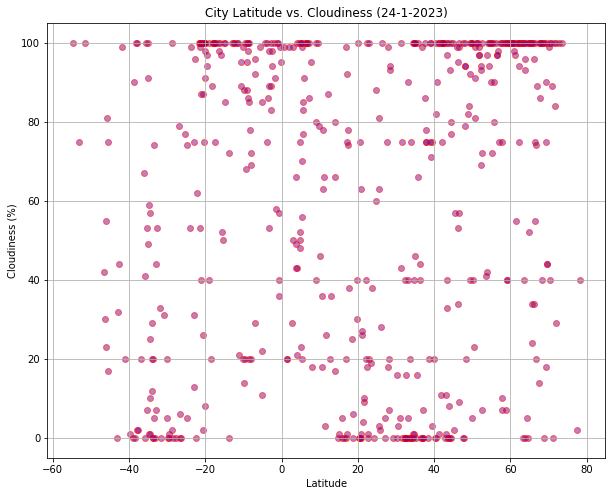

In [23]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
plt.figure(figsize=(10, 8))
plt.scatter(x_axis,y_axis, marker="o", facecolors="purple",alpha=0.5, color='r')

date = date_conv(city_data_df["Date"][0])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({date[2]}-{date[1]}-{date[0]})') 
plt.grid()

# Save the output figure
plt.savefig("C:/Users/khinh/Documents/activity/pythondata/test/Assignment/python_api_challenge/Output_data/Fig3.png")

# Show plot
plt.show()


### Latitude vs. Wind Speed Plot


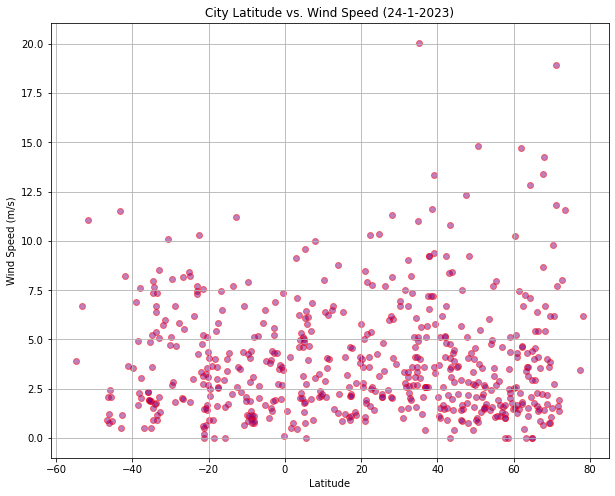

In [24]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
plt.figure(figsize=(10, 8))
plt.scatter(x_axis,y_axis, marker="o", facecolors="purple",alpha=0.5, color='r')

date = date_conv(city_data_df["Date"][0])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude vs. Wind Speed ({date[2]}-{date[1]}-{date[0]})')
plt.grid()

# Save the output figure
plt.savefig("C:/Users/khinh/Documents/activity/pythondata/test/Assignment/python_api_challenge/Output_data/Fig4.png")

# Show plot
plt.show()

### Linear Regression


In [27]:
# Define a function to create Linear Regression plots
def reg_line(x_values, y_values, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.mean(),y_values.mean()+5),fontsize=20,color="black")
    plt.xlabel('Latittude')
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()


In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,okha,53.5739,142.9478,-31.64,94,41,6.04,RU,1674493383
2,jamestown,42.0970,-79.2353,-1.23,75,100,5.14,US,1674493385
3,ilulissat,69.2167,-51.1000,-10.99,85,75,3.60,GL,1674493385
4,san quintin,30.4833,-115.9500,13.44,49,3,1.46,MX,1674493387
6,gat,31.6100,34.7642,18.55,100,0,2.77,IL,1674493388


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,san juan,-31.5375,-68.5364,35.84,21,0,6.01,AR,1674493384
5,santa fe do sul,-20.2111,-50.9258,28.51,62,91,4.35,BR,1674493387
7,puerto ayora,-0.7393,-90.3518,26.98,92,36,2.68,EC,1674493388
8,sao joao da barra,-21.6403,-41.0511,33.05,69,100,4.79,BR,1674493389
15,denpasar,-8.6500,115.2167,26.81,88,20,1.03,ID,1674493035


### Temperature vs. Latitude Linear Regression Plot


The r-value is: -0.8382036702341895


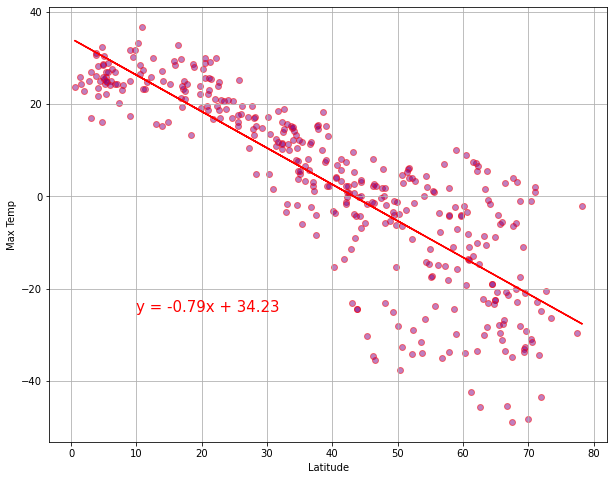

In [38]:
# Linear regression on Northern Hemisphere

x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp"]
plt.figure(figsize=(10, 8))
plt.scatter(x_axis,y_axis, marker="o", facecolors="purple",alpha=0.5, color='r')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.grid()

# Plot the linear regression line and print the r-value
plot_lin_reg(x_axis,y_axis,(10,-25))

# Save the output figure
plt.savefig("C:/Users/khinh/Documents/activity/pythondata/test/Assignment/python_api_challenge/Output_data/Fig5.png")

The r-value is: 0.4745993179506716


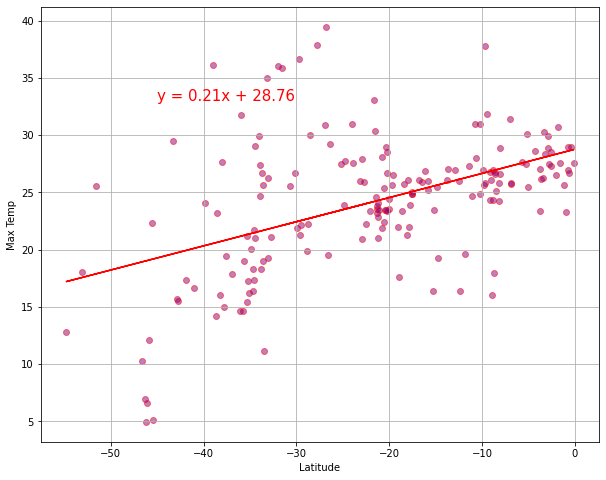

In [46]:
# Linear regression on Southern Hemisphere

x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Max Temp"]
plt.figure(figsize=(10, 8))
plt.scatter(x_axis,y_axis, marker="o", facecolors="purple",alpha=0.5, color='r')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.grid()

# Plot the linear regression line and print the r-value
plot_lin_reg(x_axis,y_axis,(-45,33))

# Save the output figure
plt.savefig("C:/Users/khinh/Documents/activity/pythondata/test/Assignment/python_api_challenge/Output_data/Fig6.png")

### Humidity vs. Latitude Linear Regression Plot


The r-value is: 0.4718043625766072


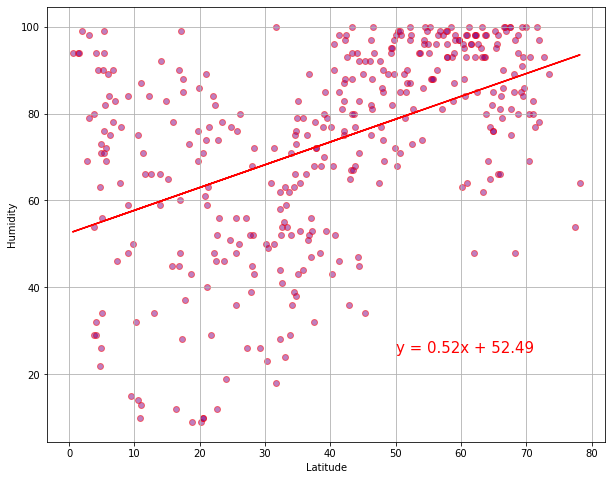

In [49]:
# Linear regression on Northern Hemisphere

x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Humidity"]
plt.figure(figsize=(10, 8))
plt.scatter(x_axis,y_axis, marker="o", facecolors="purple", alpha=0.5, color='r')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()

# Plot the linear regression line and print the r-value
plot_lin_reg(x_axis,y_axis,(50,25))

# Save the output figure
plt.savefig("C:/Users/khinh/Documents/activity/pythondata/test/Assignment/python_api_challenge/Output_data/Fig7.png")

The r-value is: 0.17399315287757627


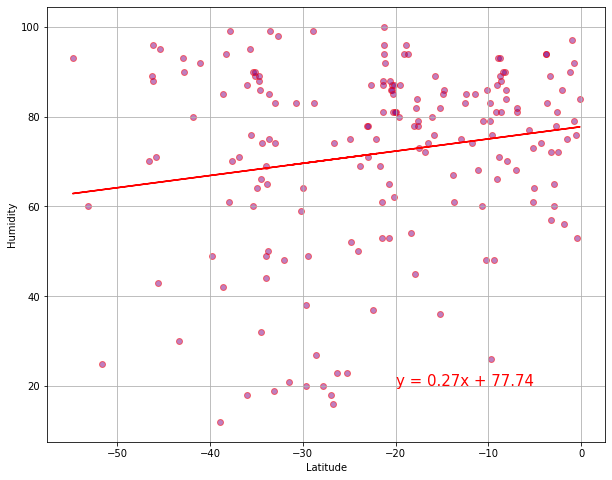

In [54]:
# Linear regression on Southern Hemisphere

x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Humidity"]
plt.figure(figsize=(10, 8))
plt.scatter(x_axis,y_axis, marker="o", facecolors="purple",alpha=0.5, color='r')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()

# Plot the linear regression line and print the r-value
plot_lin_reg(x_axis,y_axis,(-20,20))

# Save the output figure
plt.savefig("C:/Users/khinh/Documents/activity/pythondata/test/Assignment/python_api_challenge/Output_data/Fig8.png")

### Cloudiness vs. Latitude Linear Regression Plot


The r-value is: 0.2512697890250736


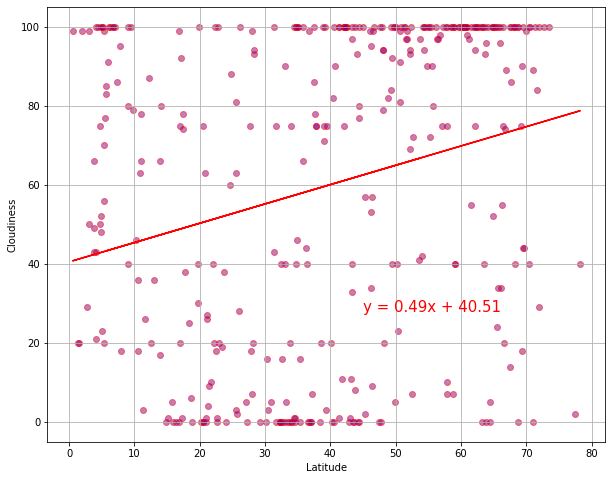

In [58]:
# Linear regression on Northern Hemisphere

x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Cloudiness"]
plt.figure(figsize=(10, 8))
plt.scatter(x_axis,y_axis, marker="o", facecolors="purple",alpha=0.5, color='r')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()

# Plot the linear regression line and print the r-value
plot_lin_reg(x_axis,y_axis,(45,28))

# Save the output figure
plt.savefig("C:/Users/khinh/Documents/activity/pythondata/test/Assignment/python_api_challenge/Output_data/Fig9.png")

The r-value is: 0.4014390387015985


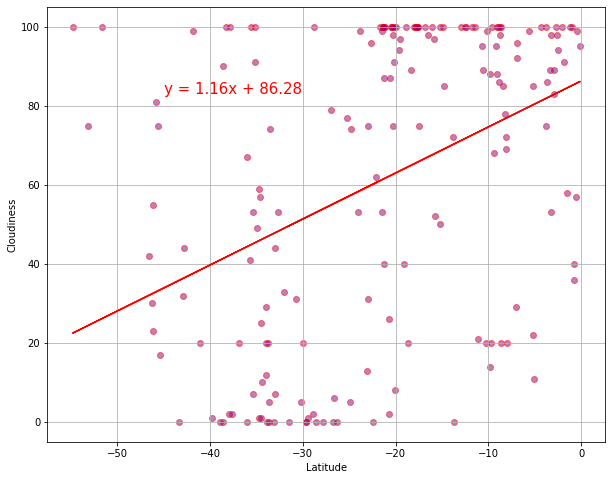

In [70]:
# Linear regression on Southern Hemisphere

x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Cloudiness"]
plt.figure(figsize=(10, 8))
plt.scatter(x_axis,y_axis, marker="o", facecolors="purple",alpha=0.5, color='r')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()

# Plot the linear regression line and print the r-value
plot_lin_reg(x_axis,y_axis,(-45,83))

# Save the output figure
plt.savefig("C:/Users/khinh/Documents/activity/pythondata/test/Assignment/python_api_challenge/Output_data/Fig10.png")

### Wind Speed vs. Latitude Linear Regression Plot


The r-value is: 0.005350233041764006


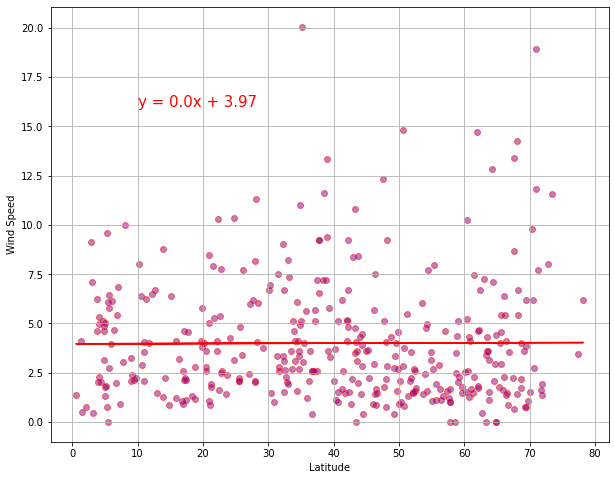

In [65]:
# Linear regression on Northern Hemisphere

x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Wind Speed"]
plt.figure(figsize=(10, 8))
plt.scatter(x_axis,y_axis, marker="o", facecolors="purple",alpha=0.5, color='r')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()

# Plot the linear regression line and print the r-value
plot_lin_reg(x_axis,y_axis,(10,16))

# Save the output figure
plt.savefig("C:/Users/khinh/Documents/activity/pythondata/test/Assignment/python_api_challenge/Output_data/Fig11.png")

The r-value is: -0.1215219825018695


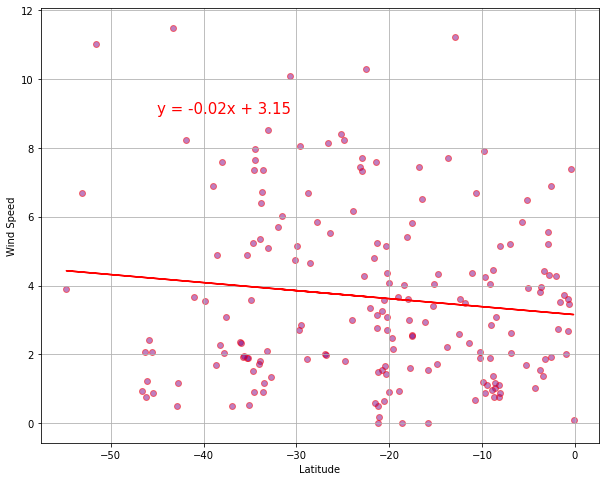

In [69]:
# Linear regression on Southern Hemisphere

x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Wind Speed"]
plt.figure(figsize=(10, 8))
plt.scatter(x_axis,y_axis, marker="o", facecolors="purple",alpha=0.5, color='r')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()

# Plot the linear regression line and print the r-value
plot_lin_reg(x_axis,y_axis,(-45,9))

# Save the output figure
plt.savefig("C:/Users/khinh/Documents/activity/pythondata/test/Assignment/python_api_challenge/Output_data/Fig12.png")
